In [1]:
import numpy as np 
import pandas as pd
import string
import spacy 

In [2]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import spacy
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunfa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [5]:
data=pd.read_csv('reviews_csv.csv',error_bad_lines=False,encoding='latin-1',header=None)

C:\Users\sunfa\AppData\Local\Temp\ipykernel_4388\2095612165.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv('reviews_csv.csv',error_bad_lines=False,encoding='latin-1',header=None)


In [6]:
data.head()

,0,1,2,3,4
0,"Nice camera, Good Battery Life, Feature rich s...",NaN,NaN,NaN,NaN
1,Mobile is good but Amazon delivery with exchan...,NaN,NaN,NaN,NaN
2,In this budget looking very good phone.,NaN,NaN,NaN,NaN
3,Liked- the Display (except the drop notch obvi...,NaN,NaN,NaN,NaN
4,"Super display, cameras, battery, performance a...",NaN,NaN,NaN,NaN


In [7]:
data.drop(data.columns[1:5], axis=1, inplace=True)


In [8]:
data.head()

,0
0,"Nice camera, Good Battery Life, Feature rich s..."
1,Mobile is good but Amazon delivery with exchan...
2,In this budget looking very good phone.
3,Liked- the Display (except the drop notch obvi...
4,"Super display, cameras, battery, performance a..."


In [9]:
data.columns=["Reviews"]
data.head()

,Reviews
0,"Nice camera, Good Battery Life, Feature rich s..."
1,Mobile is good but Amazon delivery with exchan...
2,In this budget looking very good phone.
3,Liked- the Display (except the drop notch obvi...
4,"Super display, cameras, battery, performance a..."


In [10]:
data.shape

(80, 1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  79 non-null     object
dtypes: object(1)
memory usage: 772.0+ bytes


In [12]:
data.isnull().sum()

Reviews    1
dtype: int64

In [13]:
data.dropna()

,Reviews
0,"Nice camera, Good Battery Life, Feature rich s..."
1,Mobile is good but Amazon delivery with exchan...
2,In this budget looking very good phone.
3,Liked- the Display (except the drop notch obvi...
4,"Super display, cameras, battery, performance a..."
...,...
75,I got this mobile in 14000 without charger. I...
76,M34 is good Allrounder -Mid level Budjet Smart...
77,The phone meets all the expectations for the 2...
78,"Pros; magnificent display, above average camer..."


In [14]:
affin=pd.read_csv('Afinn (1).csv',encoding='latin-1')
affin
# List of words with the value of the scores for sentiment analysis

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunfa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
import spacy
nlp=spacy.load('en_core_web_sm')   #CLEANING THE TEXT DATA

In [17]:
sentiment_lexicon = affin.set_index('word')['value'].to_dict()     #MAKING A DICTIONARY OF THE AFFIN LEXICON
sentiment_lexicon

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [18]:
def calculate_sentiment(text,str=None):   #A FUNCTION TO CALCLATE SENIMENT VALUE FOR EACH REVIEW
    sent_score=0
    if text:
            sentence=nlp(text)
            for word in sentence:
                sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [19]:
calculate_sentiment('i love the food')

3

In [21]:
data['Reviews']=data['Reviews'].astype(str)

In [22]:
data['sentiment_acore']=data['Reviews'].apply(calculate_sentiment)
data

,Reviews,sentiment_acore
0,"Nice camera, Good Battery Life, Feature rich s...",5
1,Mobile is good but Amazon delivery with exchan...,-5
2,In this budget looking very good phone.,3
3,Liked- the Display (except the drop notch obvi...,5
4,"Super display, cameras, battery, performance a...",8
...,...,...
75,I got this mobile in 14000 without charger. I...,3
76,M34 is good Allrounder -Mid level Budjet Smart...,6
77,The phone meets all the expectations for the 2...,7
78,"Pros; magnificent display, above average camer...",6


In [25]:
# Let us define the sentiment as positive negative and neutral.


sentiment=[]
for i in data['sentiment_acore']:
    if i >0:
        sentiment.append('positive')
    elif i <0:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')
    


In [26]:
data['sentiment']=sentiment
data

,Reviews,sentiment_acore,sentiment
0,"Nice camera, Good Battery Life, Feature rich s...",5,positive
1,Mobile is good but Amazon delivery with exchan...,-5,negative
2,In this budget looking very good phone.,3,positive
3,Liked- the Display (except the drop notch obvi...,5,positive
4,"Super display, cameras, battery, performance a...",8,positive
...,...,...,...
75,I got this mobile in 14000 without charger. I...,3,positive
76,M34 is good Allrounder -Mid level Budjet Smart...,6,positive
77,The phone meets all the expectations for the 2...,7,positive
78,"Pros; magnificent display, above average camer...",6,positive


In [27]:
data['sentiment'].value_counts()

positive    68
neutral      8
negative     4
Name: sentiment, dtype: int64

In [32]:
positive_sentiments = data[data['sentiment'] == 'positive']
positive_sentiments

,Reviews,sentiment_acore,sentiment
0,"Nice camera, Good Battery Life, Feature rich s...",5,positive
2,In this budget looking very good phone.,3,positive
3,Liked- the Display (except the drop notch obvi...,5,positive
4,"Super display, cameras, battery, performance a...",8,positive
6,Samsung mobile is best under budget,3,positive
...,...,...,...
75,I got this mobile in 14000 without charger. I...,3,positive
76,M34 is good Allrounder -Mid level Budjet Smart...,6,positive
77,The phone meets all the expectations for the 2...,7,positive
78,"Pros; magnificent display, above average camer...",6,positive


In [33]:
negative_sentiments = data[data['sentiment'] == 'negative']
negative_sentiments

,Reviews,sentiment_acore,sentiment
1,Mobile is good but Amazon delivery with exchan...,-5,negative
5,Heating problem.,-2,negative
53,Working fine with amoled display and adequate ...,-1,negative
63,Except for a Technical or Software error the P...,-1,negative


In [34]:
neutral_sentiments = data[data['sentiment'] == 'negative']
neutral_sentiments

,Reviews,sentiment_acore,sentiment
1,Mobile is good but Amazon delivery with exchan...,-5,negative
5,Heating problem.,-2,negative
53,Working fine with amoled display and adequate ...,-1,negative
63,Except for a Technical or Software error the P...,-1,negative


In [35]:
data.rename_axis('index',inplace=True)
data

,Reviews,sentiment_acore,sentiment
index,,,
0,"Nice camera, Good Battery Life, Feature rich s...",5,positive
1,Mobile is good but Amazon delivery with exchan...,-5,negative
2,In this budget looking very good phone.,3,positive
3,Liked- the Display (except the drop notch obvi...,5,positive
4,"Super display, cameras, battery, performance a...",8,positive
...,...,...,...
75,I got this mobile in 14000 without charger. I...,3,positive
76,M34 is good Allrounder -Mid level Budjet Smart...,6,positive
77,The phone meets all the expectations for the 2...,7,positive


In [36]:
overall_reviews = pd.DataFrame(data['sentiment'].value_counts())
overall_reviews

,sentiment
positive,68
neutral,8
negative,4


In [37]:
overall_reviews.rename_axis('index',inplace=True)
overall_reviews

,sentiment
index,
positive,68
neutral,8
negative,4


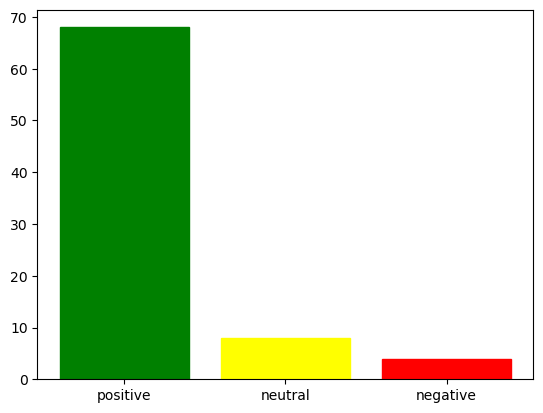

In [44]:
bars = plt.bar(overall_reviews.index,overall_reviews.sentiment)
bars[0].set_color('green')
bars[1].set_color('yellow')
bars[2].set_color('red')
plt.show()